## Introduction

Using Data from [OCO-2 Satellite](en.wikipedia.org/wiki/Orbiting_Carbon_Observatory_2), issued by the NASA.



In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm_notebook as tqdm
import numpy as np

#from mpl_toolkits.basemap import Basemap  #Imported directly from the github repository

---

## Retieve Data

Sample data can be accessed freely on the NASA Database, among other open data from several NASA sattelites.

We will be using CSV aggregated by *Benoit Courty* [here](https://courty.fr/OCO2/).

In [3]:
data_1808 = pd.read_csv("http://courty.fr/OCO2/oco2_1808.csv", sep=";")
#data_1808 = pd.read_csv("http://benemie.fr/OCO2/oco2_1808.csv", sep=";")

data_1808.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
0,2018080100462105,-33.015541,-164.508881,405.143188,0.491368,21709,3.749916,9.128431
1,2018080100462137,-32.988529,-164.553787,404.893677,0.497189,21709,3.720200,9.087859
2,2018080100462171,-32.996235,-164.435699,404.729431,0.537358,21709,3.815527,9.151507
3,2018080100462172,-32.992409,-164.455872,404.819550,0.498803,21709,3.799832,9.138914
4,2018080100462173,-32.988403,-164.476196,404.706451,0.496855,21709,3.783962,9.126184


In [4]:
data_1808.describe()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
count,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06
mean,2.018082e+15,9.176796e+00,-3.778302e+00,4.047848e+02,5.104777e-01,2.194239e+04,-1.533030e+00,2.852832e-01
std,9.141199e+08,2.900338e+01,1.112529e+02,1.868212e+00,1.293196e-01,1.332497e+02,4.292128e+00,3.490388e+00
min,2.018080e+15,-5.199191e+01,-1.799998e+02,3.895988e+02,2.017396e-03,2.170900e+04,-1.231609e+01,-1.428720e+01
25%,2.018081e+15,-1.714714e+01,-1.143912e+02,4.038899e+02,4.171058e-01,2.181300e+04,-4.930158e+00,-2.060896e+00
50%,2.018082e+15,4.388992e+00,4.388185e-01,4.052918e+02,4.851733e-01,2.195700e+04,-2.304201e+00,3.646293e-01
75%,2.018082e+15,3.448813e+01,1.007937e+02,4.060902e+02,5.803099e-01,2.205600e+04,1.599859e+00,2.797290e+00
max,2.018083e+15,8.186122e+01,1.799996e+02,4.169399e+02,1.983425e+00,2.216000e+04,1.637950e+01,1.493328e+01


In [5]:
data_1808.orbit.value_counts()

21928    16134
21715    15418
21811    14523
21983    13505
22003    13264
22085    13064
22035    13058
21922    13013
21959    12924
21913    12848
21957    12828
21901    12759
22101    12706
21945    12472
22030    12463
22105    12406
22000    12275
22029    12093
21820    12073
22021    12070
22155    11883
22061    11801
21776    11749
21977    11740
22086    11712
21799    11710
22109    11673
21986    11584
22079    11575
21711    11552
         ...  
21786     1325
22060     1294
21728     1273
22002     1268
22062     1209
21756     1184
21900     1174
22120     1167
22066     1162
21896     1053
22150     1036
21950      961
21762      671
21958      636
22008      604
21996      520
21906      473
21990      462
22054      455
21758      409
22048      386
22024      362
22052      294
21790      178
21998      111
21746      105
22110       82
22126       80
22160       40
22154       30
Name: orbit, Length: 408, dtype: int64

To convert the  ``` sounding_id ``` into a datetime variable ```data```:



In [6]:
from datetime import datetime
def to_date(a):
    return datetime.strptime(str(a), '%Y%m%d%H%M%S%f')

# data_1610['date'] = data_1610['sounding_id'].apply(to_date)
# data_1705['date'] = data_1705['sounding_id'].apply(to_date)
# data_1803['date'] = data_1803['sounding_id'].apply(to_date)
# data_1805['date'] = data_1805['sounding_id'].apply(to_date)
data_1808['date'] = data_1808['sounding_id'].apply(to_date)
# data_1809['date'] = data_1809['sounding_id'].apply(to_date)

In [7]:
data_1808.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date
0,2018080100462105,-33.015541,-164.508881,405.143188,0.491368,21709,3.749916,9.128431,2018-08-01 00:46:21.050
1,2018080100462137,-32.988529,-164.553787,404.893677,0.497189,21709,3.720200,9.087859,2018-08-01 00:46:21.370
2,2018080100462171,-32.996235,-164.435699,404.729431,0.537358,21709,3.815527,9.151507,2018-08-01 00:46:21.710
3,2018080100462172,-32.992409,-164.455872,404.819550,0.498803,21709,3.799832,9.138914,2018-08-01 00:46:21.720
4,2018080100462173,-32.988403,-164.476196,404.706451,0.496855,21709,3.783962,9.126184,2018-08-01 00:46:21.730


---

### Laiwu, 25th August 2018

In [8]:
# We consider the August 2018 datset at the right day
data_1808_25 = data_1808[data_1808['date'] < "2018-08-26"]
data_1808_25 = data_1808_25[data_1808_25['date'] > "2018-08-25"]

#draw_map(data_1808_25)

In [9]:
# We consider the orgit going over East China
#data_laiwu = data_1808_25[data_1808_25['longitude'] > 110]
#data_laiwu = data_laiwu[data_laiwu['longitude'] < 125]
data_laiwu = data_1808_25[data_1808_25['orbit'] == 22061]
data_laiwu.head(3)

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date
2061319,2018082504501738,-43.749119,135.989822,403.642273,0.572042,22061,11.114212,-4.509858,2018-08-25 04:50:17.380
2061320,2018082504501777,-43.735889,136.010880,404.398529,0.466245,22061,11.103701,-4.486870,2018-08-25 04:50:17.770
2061321,2018082504501778,-43.731358,135.985352,404.115814,0.528921,22061,11.101484,-4.501010,2018-08-25 04:50:17.780


### Compute distance from latitude, longitude (haversine)

In [10]:
import math
df_full = pd.DataFrame()
for orbit in tqdm(data_1808_25['orbit'].unique()):
    df_orbit = data_1808_25[data_1808_25['orbit'] == orbit]
    latitude_origin = df_orbit.iloc[0]['latitude']
    longitude_origin = df_orbit.iloc[0]['longitude']
    df_orbit['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin((np.radians(df_orbit['latitude'])
        - math.radians(latitude_origin))/2)**2 + math.cos(math.radians(latitude_origin))
        * np.cos(np.radians(df_orbit['latitude'])) * np.sin((np.radians(df_orbit['longitude'])
        - math.radians(longitude_origin))/2)**2))
    df_full = df_full.append(df_orbit)
df_full = df_full.sort_values(by=['orbit','distance']).reindex()


#TODO: Change the formula to compute the distance from the trace origin
# latitude_origin = data_laiwu.iloc[0]['latitude']
# longitude_origin = data_laiwu.iloc[0]['longitude']
# data_laiwu['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin((np.radians(data_laiwu['latitude'])
#     - math.radians(latitude_origin))/2)**2 + math.cos(math.radians(latitude_origin))
#     * np.cos(np.radians(data_laiwu['latitude'])) * np.sin((np.radians(data_laiwu['longitude'])
#     - math.radians(longitude_origin))/2)**2))
# data_laiwu.plot.scatter(x='distance', y='xco2')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [202]:
df_full.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date,distance
2043481,2018082500001474,-22.253984,-154.654938,404.564148,0.500219,22058,0.378373,-5.757070,2018-08-25 00:00:14.740,0.000000
2043482,2018082500001505,-22.235153,-154.674118,405.992462,0.573346,22058,0.385515,-5.745126,2018-08-25 00:00:15.050,2.875928
2043483,2018082500001506,-22.234627,-154.689468,405.832611,0.500685,22058,0.396247,-5.737138,2018-08-25 00:00:15.060,4.152293
2043484,2018082500001535,-22.216774,-154.678070,405.446381,0.532673,22058,0.381988,-5.741576,2018-08-25 00:00:15.350,4.770748
2043485,2018082500001536,-22.216249,-154.693420,407.183289,0.486570,22058,0.392724,-5.733892,2018-08-25 00:00:15.360,5.766514


# Gaussian fit

## scipy curve_fit

In [11]:

df_full[df_full.orbit == 22058].head(3)

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date,distance
2043481,2018082500001474,-22.253984,-154.654938,404.564148,0.500219,22058,0.378373,-5.757070,2018-08-25 00:00:14.740,0.000000
2043482,2018082500001505,-22.235153,-154.674118,405.992462,0.573346,22058,0.385515,-5.745126,2018-08-25 00:00:15.050,2.875928
2043483,2018082500001506,-22.234627,-154.689468,405.832611,0.500685,22058,0.396247,-5.737138,2018-08-25 00:00:15.060,4.152293


In [17]:
df_full.describe()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,distance
count,9.211400e+04,92114.000000,92114.000000,92114.000000,92114.000000,92114.000000,92114.000000,92114.000000,92114.000000
mean,2.018083e+15,9.917281,-25.169667,404.417921,0.533103,22065.078967,-2.421922,0.528176,4359.206343
std,7.797602e+06,29.222218,109.200540,1.903471,0.130233,4.723770,3.858143,3.440312,2981.394644
min,2.018083e+15,-48.729591,-179.809555,395.101807,0.079525,22058.000000,-9.962760,-12.333817,0.000000
25%,2.018083e+15,-17.499096,-129.407707,403.234192,0.444428,22061.000000,-5.328380,-1.312067,1804.801304
50%,2.018083e+15,10.606698,-28.205615,404.890884,0.507864,22065.000000,-2.918830,0.929119,3545.853349
75%,2.018083e+15,36.228706,65.320446,405.885704,0.602090,22070.000000,-0.208261,2.823023,6875.382562
max,2.018083e+15,80.621101,179.931183,412.967621,1.528355,22072.000000,11.114212,9.468055,12892.868810


In [129]:
#features to be refined

window = 200
good_find = 0

peak_founds = []

'''
x : the data input value
m : the slope of the data
b : the intercep of the data
A : Amplitude de la courbe
sig : sigma / écart type de la courbe
'''
def gaussian(x, m, b, A, sig):
    return m * x + b + A / (sig * (2 * np.pi)**0.5) * np.exp(-x**2 / (2*sig**2))

for orbit in tqdm(df_full['orbit'].unique(), desc='Orbit'):
#for orbit in tqdm([22061, 21928, 16134, 21715], desc='Orbit'):
    df_orbit = df_full[df_full['orbit'] == orbit]
    if len(df_orbit) < 500:
        continue
    latitude_origin = df_orbit.iloc[0]['latitude']
    longitude_origin = df_orbit.iloc[0]['longitude']
    
    try:
        # Loop over the souding id's
        for i, j in tqdm(enumerate(df_orbit.index), desc='Souding', total=len(df_orbit)):
            # Work only each n soundings (15 seems good)
            if i % 15 != 0: continue
            ## !!!!!!
            #j = 2070068
            km_start = df_orbit.loc[j, 'distance']
            km_end = km_start + window
            # Slice back because our input point is the middle of the peak
            df_slice = df_orbit.query('distance >= (@km_start-@window/2) and distance <= @km_end')
            # Skip if too few data
            if len(df_slice)<400:
                #print('ERROR : Not enought data')
                continue
            med_temp = np.median(df_slice['xco2'])
            std_temp = np.std(df_slice['xco2'])
            df_slice['xco2_enhancement'] = df_slice['xco2'] - med_temp
            # Base parameters for : m, b, A, sig
            p0 = (0.,med_temp,30*df_slice.loc[j,'xco2_enhancement'],10.) 
            #print('Estimated parameters:', p0)
            d_centered = df_slice['distance'] - km_start
            '''
            Gaussian Fit
            scipy.optimize.curve_fit
            scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
            p0 = Initial guess for the parameters (length N).
            sigma : Determines the uncertainty in ydata.
            '''
            popt, pcov = curve_fit(f=gaussian, xdata=d_centered, ydata=df_slice['xco2'], sigma = df_slice['xco2_uncert'], p0 = p0, maxfev=20000,ftol=0.5, xtol=0.5)
    #         print('Best m, b, A, sig = ', popt)
    #         plt.plot(d_centered, gaussian(x = d_centered, m=popt[0], b=popt[1], A=popt[2], sig=popt[3]), 'r', label='fit')
    #         plt.scatter(x=d_centered, y=df_slice['xco2']) 
            sig = abs(popt[3]) 
            m=popt[0]
            b=popt[1]
            A=popt[2]
            # sigma of the Gaussian (km)
            #print(sig)
            
            #if sig < 2 : continue  # too narrow
            
            #if 3*sig > window / 2.: continue  # too large
            
            delta = popt[2]/(popt[3]*(2 * np.pi)**0.5)  # height of the peak (ppm)
            #if delta < 0: continue  # depletion
            
            #d_plume = df_slice[(d_centered >= -2*sig) & (d_centered <= 2*sig)]
            #d_backg = df_slice[(d_centered < -2*sig) | (d_centered > 2*sig)]
           
            
            # we want at least 1 1-km-sounding per km on average on both sides of the peak within 2 sigmas and between 2 and 3 sigmas
            #if len(df_slice[(d_centered >= -1*sig) & (d_centered <= 0)]) < int(sig): continue
            #if len(df_slice[(d_centered <= 1*sig) & (d_centered >= 0)]) < int(sig): continue
            #if len(df_slice[(d_centered >= -3*sig) & (d_centered <= -2*sig)]) < int(sig): continue
            #if len(df_slice[(d_centered <= 3*sig) & (d_centered >= 2*sig)]) < int(sig): continue
            
            
            d1=len(df_slice[(d_centered >= -1*sig) & (d_centered <= 0)]) 
            d2= len(df_slice[(d_centered <= 1*sig) & (d_centered >= 0)]) 
            d3= len(df_slice[(d_centered >= -3*sig) & (d_centered <= -2*sig)]) 
            d4 =len(df_slice[(d_centered <= 3*sig) & (d_centered >= 2*sig)]) 
            # check the quality of the fit
            d_peak = df_slice[(d_centered >= -4*sig) & (d_centered <= 4*sig)]
            d_peak_distance = d_peak['distance'] - df_slice.loc[j, 'distance']
            R = np.corrcoef(gaussian(d_peak_distance,*popt), d_peak['xco2'])
            if R[0,1]**2 < 0.25 : continue
            good_find += 1
            r=R[0,1]**2
            print('index',j, 'Number of good fit',good_find, 'Sigma:', sig, 'Ampleur de l\'émission de CO²:',delta,'Coef de coreflation',R, 'len dataset:', len(df_slice))
            # TODO: Add filename of input to be able to load it later
            peak = {
                'sounding' : j,
                'latitude' : df_slice.loc[j, 'latitude'],
                'longitude' : df_slice.loc[j, 'longitude'],
                'orbit' : orbit,
                'sigma': sig,
                'popt': popt,
                'delta': delta,
                'R' : r,
                'D1':d1,
                'D1':d2,
                'D2':d3,
                'D3':d4,
                'm':m,
                'b':b,
                'A':a
            }
            #print(peak)
            peak_founds.append(peak)
            #break
        if good_find==0:
            print('NO PEAK FOUND for orbit', orbit)
        else:
            df_peak = pd.DataFrame(peak_founds)
         
    except RuntimeError: 
      # curve_fit failed 
      print('LOST orbit', orbit, 'j', j)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


index 2048291 Number of good fit 1 Sigma: 7.92521266334901 Ampleur de l'émission de CO²: -0.012004153681250958 Coef de coreflation [[1.         0.54388822]
 [0.54388822 1.        ]] len dataset: 650


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index 2049204 Number of good fit 2 Sigma: 9.373902553601578 Ampleur de l'émission de CO²: 0.21006392958989498 Coef de coreflation [[1.         0.52032314]
 [0.52032314 1.        ]] len dataset: 427
index 2050344 Number of good fit 3 Sigma: 0.12109836855413114 Ampleur de l'émission de CO²: -3.9319121607702336 Coef de coreflation [[ 1.         -0.70906957]
 [-0.70906957  1.        ]] len dataset: 699
index 2051032 Number of good fit 4 Sigma: 4.903154770918867 Ampleur de l'émission de CO²: 0.17676677109254352 Coef de coreflation [[1.         0.50785481]
 [0.50785481 1.        ]] len dataset: 627
index 2051401 Number of good fit 5 Sigma: 7.809996292307818 Ampleur de l'émission de CO²: -1.0439673030855883 Coef de coreflation [[1.         0.73224075]
 [0.73224075 1.        ]] len dataset: 896
index 2052174 Number of good fit 6 Sigma: 5.574031852455367 Ampleur de l'émission de CO²: 0.23533608617167145 Coef de coreflation [[ 1.         -0.66848031]
 [-0.66848031  1.        ]] len dataset: 679


index 2055326 Number of good fit 8 Sigma: 3.31930166321445 Ampleur de l'émission de CO²: -0.13481367882723744 Coef de coreflation [[1.         0.59748231]
 [0.59748231 1.        ]] len dataset: 522
index 2055446 Number of good fit 9 Sigma: 28.508665961745937 Ampleur de l'émission de CO²: 0.25854369821495116 Coef de coreflation [[1.        0.5160943]
 [0.5160943 1.       ]] len dataset: 496
index 2055476 Number of good fit 10 Sigma: 21.180557751805033 Ampleur de l'émission de CO²: 0.3696454876887553 Coef de coreflation [[1.         0.52450166]
 [0.52450166 1.        ]] len dataset: 480
index 2055551 Number of good fit 11 Sigma: 21.834273265049553 Ampleur de l'émission de CO²: 0.30566891353486636 Coef de coreflation [[1.         0.55251505]
 [0.55251505 1.        ]] len dataset: 476
index 2055581 Number of good fit 12 Sigma: 20.808912958358725 Ampleur de l'émission de CO²: 0.2645983074118033 Coef de coreflation [[1.         0.50703758]
 [0.50703758 1.        ]] len dataset: 475
index 205

index 2060339 Number of good fit 39 Sigma: 35.15598328889739 Ampleur de l'émission de CO²: -1.0209893571005424 Coef de coreflation [[1.         0.56360033]
 [0.56360033 1.        ]] len dataset: 405
index 2060353 Number of good fit 40 Sigma: 21.821640951215905 Ampleur de l'émission de CO²: -1.502677986814145 Coef de coreflation [[1.         0.67548052]
 [0.67548052 1.        ]] len dataset: 416
index 2060362 Number of good fit 41 Sigma: 16.806398726082605 Ampleur de l'émission de CO²: -1.6542535177882154 Coef de coreflation [[1.        0.6402589]
 [0.6402589 1.       ]] len dataset: 428
index 2060379 Number of good fit 42 Sigma: 19.65096709672654 Ampleur de l'émission de CO²: -1.3217785889645757 Coef de coreflation [[1.         0.62109722]
 [0.62109722 1.        ]] len dataset: 434
index 2060424 Number of good fit 43 Sigma: 18.276074730938845 Ampleur de l'émission de CO²: 1.0440426912245035 Coef de coreflation [[1.         0.53820846]
 [0.53820846 1.        ]] len dataset: 502
index 20

index 2069044 Number of good fit 47 Sigma: 12.955507486323668 Ampleur de l'émission de CO²: 0.07396436486515022 Coef de coreflation [[1.       0.533906]
 [0.533906 1.      ]] len dataset: 754
index 2069799 Number of good fit 48 Sigma: 12.757214472214399 Ampleur de l'émission de CO²: 0.3659303073826359 Coef de coreflation [[1.         0.52260953]
 [0.52260953 1.        ]] len dataset: 557
index 2069868 Number of good fit 49 Sigma: 21.44186102592679 Ampleur de l'émission de CO²: -1.6140929027565905 Coef de coreflation [[1.         0.64973679]
 [0.64973679 1.        ]] len dataset: 694
index 2069916 Number of good fit 50 Sigma: 24.20608792409184 Ampleur de l'émission de CO²: -1.3486439626569733 Coef de coreflation [[1.         0.63863559]
 [0.63863559 1.        ]] len dataset: 707
index 2070040 Number of good fit 51 Sigma: 16.993526791152792 Ampleur de l'émission de CO²: 2.9065145490470434 Coef de coreflation [[1.         0.72913036]
 [0.72913036 1.        ]] len dataset: 829
index 207005

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index 2070545 Number of good fit 73 Sigma: 10.0 Ampleur de l'émission de CO²: -0.43551242211593266 Coef de coreflation [[1.         0.72505416]
 [0.72505416 1.        ]] len dataset: 703
index 2070572 Number of good fit 74 Sigma: 12.80047764389968 Ampleur de l'émission de CO²: -0.3800808675072015 Coef de coreflation [[1.         0.76088972]
 [0.76088972 1.        ]] len dataset: 696
index 2070596 Number of good fit 75 Sigma: 170.2026042511306 Ampleur de l'émission de CO²: 0.05200712771304621 Coef de coreflation [[1.         0.50884941]
 [0.50884941 1.        ]] len dataset: 706
index 2070613 Number of good fit 76 Sigma: 29.51788662737621 Ampleur de l'émission de CO²: -0.43191054028715287 Coef de coreflation [[1.         0.70862876]
 [0.70862876 1.        ]] len dataset: 717
index 2070631 Number of good fit 77 Sigma: 236.63302515959558 Ampleur de l'émission de CO²: -0.053707760974154424 Coef de coreflation [[1.         0.54918366]
 [0.54918366 1.        ]] len dataset: 717
index 2070670

index 2073601 Number of good fit 95 Sigma: 12.41914594689974 Ampleur de l'émission de CO²: -0.9105794566673351 Coef de coreflation [[1.         0.51770377]
 [0.51770377 1.        ]] len dataset: 408
index 2073756 Number of good fit 96 Sigma: 6.065753512477013 Ampleur de l'émission de CO²: 1.3467892499755831 Coef de coreflation [[1.         0.65015007]
 [0.65015007 1.        ]] len dataset: 502


index 2074794 Number of good fit 97 Sigma: 151.57459051518111 Ampleur de l'émission de CO²: -0.017448756435100615 Coef de coreflation [[1.         0.54018443]
 [0.54018443 1.        ]] len dataset: 528
index 2075153 Number of good fit 98 Sigma: 39.31208704806141 Ampleur de l'émission de CO²: 0.13130386575012937 Coef de coreflation [[1.       0.624836]
 [0.624836 1.      ]] len dataset: 944
index 2075214 Number of good fit 99 Sigma: 183.89020330993898 Ampleur de l'émission de CO²: 0.01910068602190188 Coef de coreflation [[1.         0.73858938]
 [0.73858938 1.        ]] len dataset: 955
index 2075229 Number of good fit 100 Sigma: 16.242664153226137 Ampleur de l'émission de CO²: 0.1766679135994903 Coef de coreflation [[1.         0.56979073]
 [0.56979073 1.        ]] len dataset: 951
index 2075244 Number of good fit 101 Sigma: 13.188522777191826 Ampleur de l'émission de CO²: 0.16778077525936294 Coef de coreflation [[1.         0.56588331]
 [0.56588331 1.        ]] len dataset: 945
index 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index 2075769 Number of good fit 106 Sigma: 38.27949154581458 Ampleur de l'émission de CO²: -0.15943481391478517 Coef de coreflation [[1.         0.57585543]
 [0.57585543 1.        ]] len dataset: 425
index 2076523 Number of good fit 107 Sigma: 24.434586877256258 Ampleur de l'émission de CO²: 0.13847053742453752 Coef de coreflation [[1.         0.62522342]
 [0.62522342 1.        ]] len dataset: 409
index 2076558 Number of good fit 108 Sigma: 20.372362535247813 Ampleur de l'émission de CO²: -0.15034040725659772 Coef de coreflation [[1.         0.65160957]
 [0.65160957 1.        ]] len dataset: 420
index 2077295 Number of good fit 109 Sigma: 35.044063806997826 Ampleur de l'émission de CO²: 0.6256135213091285 Coef de coreflation [[1.         0.65610188]
 [0.65610188 1.        ]] len dataset: 459
index 2077686 Number of good fit 110 Sigma: 4.0126025902624685 Ampleur de l'émission de CO²: -0.36716448725469714 Coef de coreflation [[1.         0.52215568]
 [0.52215568 1.        ]] len dataset

 [0.51135205 1.        ]] len dataset: 488


index 2080408 Number of good fit 147 Sigma: 10.575499626614553 Ampleur de l'émission de CO²: 0.9137140656360028 Coef de coreflation [[1.         0.53379687]
 [0.53379687 1.        ]] len dataset: 477
index 2080420 Number of good fit 148 Sigma: 6.397014300208792 Ampleur de l'émission de CO²: 0.597622188722423 Coef de coreflation [[1.         0.72162164]
 [0.72162164 1.        ]] len dataset: 499
index 2080984 Number of good fit 149 Sigma: 6.5207288967249095 Ampleur de l'émission de CO²: -0.25654064837700397 Coef de coreflation [[ 1.        -0.5828608]
 [-0.5828608  1.       ]] len dataset: 727
index 2082687 Number of good fit 150 Sigma: 13.936161123271033 Ampleur de l'émission de CO²: 0.03535188298462626 Coef de coreflation [[1.         0.56142904]
 [0.56142904 1.        ]] len dataset: 785
index 2082723 Number of good fit 151 Sigma: 10.846388619414284 Ampleur de l'émission de CO²: -0.16951536641215278 Coef de coreflation [[1.         0.56724306]
 [0.56724306 1.        ]] len dataset: 7

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index 2086525 Number of good fit 166 Sigma: 11.021224336971567 Ampleur de l'émission de CO²: 0.7492648904316989 Coef de coreflation [[1.         0.54303388]
 [0.54303388 1.        ]] len dataset: 417
index 2088897 Number of good fit 167 Sigma: 52.51189343743792 Ampleur de l'émission de CO²: 0.06887958620054556 Coef de coreflation [[1.         0.52885019]
 [0.52885019 1.        ]] len dataset: 1045
index 2088927 Number of good fit 168 Sigma: 78.12127228826779 Ampleur de l'émission de CO²: -0.048741556537575635 Coef de coreflation [[1.         0.50728797]
 [0.50728797 1.        ]] len dataset: 1044
index 2090307 Number of good fit 169 Sigma: 3.7296182646299094 Ampleur de l'émission de CO²: 0.1526263048677284 Coef de coreflation [[1.         0.69727801]
 [0.69727801 1.        ]] len dataset: 688
index 2092208 Number of good fit 170 Sigma: 177.32884360468407 Ampleur de l'émission de CO²: 0.03542678828857031 Coef de coreflation [[1.         0.54480949]
 [0.54480949 1.        ]] len dataset:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index 2093949 Number of good fit 186 Sigma: 7.566978352690835 Ampleur de l'émission de CO²: 0.6458349597537608 Coef de coreflation [[1.         0.50771063]
 [0.50771063 1.        ]] len dataset: 454
index 2094181 Number of good fit 187 Sigma: 4.438072300111362 Ampleur de l'émission de CO²: 0.4829410860887109 Coef de coreflation [[1.         0.53521485]
 [0.53521485 1.        ]] len dataset: 402
index 2094609 Number of good fit 188 Sigma: 146.87562093190095 Ampleur de l'émission de CO²: -0.019766305854193242 Coef de coreflation [[1.         0.56896949]
 [0.56896949 1.        ]] len dataset: 468
index 2094653 Number of good fit 189 Sigma: 22.055786507248534 Ampleur de l'émission de CO²: 0.17997332778669062 Coef de coreflation [[1.         0.51927492]
 [0.51927492 1.        ]] len dataset: 797
index 2094720 Number of good fit 190 Sigma: 17.95401213919786 Ampleur de l'émission de CO²: 0.33657457167100274 Coef de coreflation [[1.         0.56575816]
 [0.56575816 1.        ]] len dataset: 83

index 2096130 Number of good fit 209 Sigma: 32.51607152876618 Ampleur de l'émission de CO²: -0.57149873306113 Coef de coreflation [[1.         0.55255348]
 [0.55255348 1.        ]] len dataset: 414
index 2096236 Number of good fit 210 Sigma: 30.3899821877585 Ampleur de l'émission de CO²: -0.5438513041637418 Coef de coreflation [[1.         0.56274673]
 [0.56274673 1.        ]] len dataset: 455
index 2096233 Number of good fit 211 Sigma: 21.307366530908077 Ampleur de l'émission de CO²: -0.5034639023424432 Coef de coreflation [[1.         0.55405274]
 [0.55405274 1.        ]] len dataset: 460
index 2096494 Number of good fit 212 Sigma: 104.75748831096764 Ampleur de l'émission de CO²: 0.11182554532851977 Coef de coreflation [[1.         0.66784038]
 [0.66784038 1.        ]] len dataset: 460
index 2096499 Number of good fit 213 Sigma: 30.41314392594881 Ampleur de l'émission de CO²: -0.4038742139378067 Coef de coreflation [[1.         0.53972621]
 [0.53972621 1.        ]] len dataset: 475
i

index 2098408 Number of good fit 217 Sigma: 13.332583673405313 Ampleur de l'émission de CO²: -1.0101083976903835 Coef de coreflation [[1.         0.63866762]
 [0.63866762 1.        ]] len dataset: 474
index 2098423 Number of good fit 218 Sigma: 16.705850587138958 Ampleur de l'émission de CO²: -0.6952822457273895 Coef de coreflation [[1.         0.65093791]
 [0.65093791 1.        ]] len dataset: 489
index 2098437 Number of good fit 219 Sigma: 25.68759565606701 Ampleur de l'émission de CO²: -0.4176301801482069 Coef de coreflation [[1.         0.67484456]
 [0.67484456 1.        ]] len dataset: 498
index 2098449 Number of good fit 220 Sigma: 31.66035754838217 Ampleur de l'émission de CO²: -0.3004159147792605 Coef de coreflation [[1.         0.59375495]
 [0.59375495 1.        ]] len dataset: 511
index 2098470 Number of good fit 221 Sigma: 17.631492191558152 Ampleur de l'émission de CO²: -0.3472834328609145 Coef de coreflation [[1.         0.58952597]
 [0.58952597 1.        ]] len dataset: 5

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index 2101497 Number of good fit 245 Sigma: 10.0 Ampleur de l'émission de CO²: -0.2171325997294538 Coef de coreflation [[1.        0.5734063]
 [0.5734063 1.       ]] len dataset: 423
index 2101520 Number of good fit 246 Sigma: 11.23659035064867 Ampleur de l'émission de CO²: -0.189917568778203 Coef de coreflation [[1.         0.62252643]
 [0.62252643 1.        ]] len dataset: 413
index 2101526 Number of good fit 247 Sigma: 7.425591444589875 Ampleur de l'émission de CO²: -0.11311608582278687 Coef de coreflation [[1.         0.54974094]
 [0.54974094 1.        ]] len dataset: 402
index 2102037 Number of good fit 248 Sigma: 5.598875709685963 Ampleur de l'émission de CO²: -0.15825935285113746 Coef de coreflation [[ 1.         -0.58456689]
 [-0.58456689  1.        ]] len dataset: 746
index 2102112 Number of good fit 249 Sigma: 3.5946035597214276 Ampleur de l'émission de CO²: 1.2468423047189126 Coef de coreflation [[1.         0.53360203]
 [0.53360203 1.        ]] len dataset: 806
index 210229

index 2104863 Number of good fit 263 Sigma: 17.237033790493978 Ampleur de l'émission de CO²: 0.1687426974592383 Coef de coreflation [[1.         0.60692483]
 [0.60692483 1.        ]] len dataset: 597
index 2104970 Number of good fit 264 Sigma: 16.863073436141132 Ampleur de l'émission de CO²: -0.8943510272633238 Coef de coreflation [[1.         0.52005349]
 [0.52005349 1.        ]] len dataset: 659


index 2106595 Number of good fit 265 Sigma: 22.963828419855098 Ampleur de l'émission de CO²: -0.015027424542550514 Coef de coreflation [[1.         0.54627217]
 [0.54627217 1.        ]] len dataset: 633
index 2109416 Number of good fit 266 Sigma: 10.0 Ampleur de l'émission de CO²: 0.2576421062577856 Coef de coreflation [[1.         0.58909336]
 [0.58909336 1.        ]] len dataset: 408
index 2109419 Number of good fit 267 Sigma: 4.294772918410255 Ampleur de l'émission de CO²: 0.28756247367354226 Coef de coreflation [[1.         0.55145791]
 [0.55145791 1.        ]] len dataset: 423
index 2109482 Number of good fit 268 Sigma: 11.774997818328897 Ampleur de l'émission de CO²: -0.11849118707911704 Coef de coreflation [[1.         0.52004396]
 [0.52004396 1.        ]] len dataset: 457
index 2109573 Number of good fit 269 Sigma: 7.7062323893000135 Ampleur de l'émission de CO²: -0.3978033748114487 Coef de coreflation [[1.         0.52245182]
 [0.52245182 1.        ]] len dataset: 548
index 21

index 2112540 Number of good fit 278 Sigma: 10.896339126105417 Ampleur de l'émission de CO²: 1.7474803036622302 Coef de coreflation [[1.         0.72072435]
 [0.72072435 1.        ]] len dataset: 441
index 2112549 Number of good fit 279 Sigma: 8.346903299894763 Ampleur de l'émission de CO²: 0.2810900692595294 Coef de coreflation [[1.         0.59092752]
 [0.59092752 1.        ]] len dataset: 475
index 2112638 Number of good fit 280 Sigma: 14.169638816510309 Ampleur de l'émission de CO²: -1.5864203137057102 Coef de coreflation [[1.         0.61098524]
 [0.61098524 1.        ]] len dataset: 549
index 2112752 Number of good fit 281 Sigma: 20.035962705328856 Ampleur de l'émission de CO²: 0.9419992801196886 Coef de coreflation [[1.         0.50954173]
 [0.50954173 1.        ]] len dataset: 610
index 2112761 Number of good fit 282 Sigma: 21.348718659663927 Ampleur de l'émission de CO²: 1.0539278838679713 Coef de coreflation [[1.         0.59510913]
 [0.59510913 1.        ]] len dataset: 614


index 2115756 Number of good fit 319 Sigma: 20.726159341338537 Ampleur de l'émission de CO²: -0.6226261710700827 Coef de coreflation [[1.         0.69302733]
 [0.69302733 1.        ]] len dataset: 417
index 2115812 Number of good fit 320 Sigma: 28.155562699272078 Ampleur de l'émission de CO²: -0.17921996224791742 Coef de coreflation [[1.         0.64371354]
 [0.64371354 1.        ]] len dataset: 430
index 2115834 Number of good fit 321 Sigma: 25.36939674792388 Ampleur de l'émission de CO²: -0.13509052283352263 Coef de coreflation [[1.         0.59519019]
 [0.59519019 1.        ]] len dataset: 419
index 2115856 Number of good fit 322 Sigma: 213.43589236654165 Ampleur de l'émission de CO²: -0.01196375253657585 Coef de coreflation [[1.         0.74739002]
 [0.74739002 1.        ]] len dataset: 408
index 2116322 Number of good fit 323 Sigma: 22.413214367772035 Ampleur de l'émission de CO²: -0.8100828399615156 Coef de coreflation [[1.         0.62164781]
 [0.62164781 1.        ]] len datase

index 2118110 Number of good fit 328 Sigma: 7.095593964295553 Ampleur de l'émission de CO²: -0.29813306809355533 Coef de coreflation [[1.         0.51597742]
 [0.51597742 1.        ]] len dataset: 822


KeyboardInterrupt: 

In [199]:
df_peak

,A,D1,D2,D3,R,b,delta,latitude,longitude,m,orbit,popt,sigma,sounding
0,35,7,12,5,0.295814,405.330597,-0.012004,7.766434,-160.951752,-0.000385,22058,"[-0.00038491117010610795, 405.3305972638769, -...",7.925213,2048291
1,35,20,0,28,0.270736,404.280667,0.210064,22.682747,-164.540665,0.002804,22058,"[0.0028042498731857, 404.28066713761785, -4.93...",9.373903,2049204
2,35,1,0,0,0.502780,404.174426,-3.931912,26.769737,-165.632233,-0.002499,22058,"[-0.0024987463400195165, 404.174425850641, -1....",0.121098,2050344
3,35,15,1,5,0.257917,403.853147,0.176767,30.360455,-166.657928,-0.002699,22058,"[-0.0026985228139811833, 403.85314720581977, 2...",4.903155,2051032
4,35,17,30,28,0.536177,403.592466,-1.043967,31.700054,-167.058441,-0.000679,22058,"[-0.0006793264731544574, 403.59246582722045, -...",7.809996,2051401
5,35,14,0,20,0.446866,403.562542,0.235336,33.982178,-167.763992,0.000571,22058,"[0.0005714012700418503, 403.5625421895059, 3.2...",5.574032,2052174
6,35,25,35,23,0.298721,403.715635,-0.005325,36.646774,-168.647888,0.000419,22058,"[0.00041883830251173294, 403.71563505178455, -...",9.139425,2052945
7,35,4,0,7,0.356985,405.976632,-0.134814,-22.639339,-179.295380,-0.000200,22059,"[-0.00019970764511111403, 405.97663173246667, ...",3.319302,2055326
8,35,105,3,94,0.266353,405.877648,0.258544,-22.271223,-179.403839,-0.000456,22059,"[-0.0004555931237163811, 405.87764811366196, 1...",28.508666,2055446
9,35,78,15,78,0.275102,405.886347,0.369645,-22.198130,-179.404160,-0.001361,22059,"[-0.0013605692707354708, 405.8863469878652, 19...",21.180558,2055476


## Detection d'anomalies parmi les gaussiennes 

In [131]:
df_peak_new= df_peak.drop(['popt'], axis=1)

In [132]:
df_peak_new.head()

,A,D1,D2,D3,R,b,delta,latitude,longitude,m,orbit,sigma,sounding
0,35,7,12,5,0.295814,405.330597,-0.012004,7.766434,-160.951752,-0.000385,22058,7.925213,2048291
1,35,20,0,28,0.270736,404.280667,0.210064,22.682747,-164.540665,0.002804,22058,9.373903,2049204
2,35,1,0,0,0.502780,404.174426,-3.931912,26.769737,-165.632233,-0.002499,22058,0.121098,2050344
3,35,15,1,5,0.257917,403.853147,0.176767,30.360455,-166.657928,-0.002699,22058,4.903155,2051032
4,35,17,30,28,0.536177,403.592466,-1.043967,31.700054,-167.058441,-0.000679,22058,7.809996,2051401


In [133]:
import numpy as np
X = df_peak_new.values

In [134]:
#Local outliers factor

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

C:\Users\Degot Charlotte\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [135]:
df_peak_new['outlier_score']=X_scores*(-1)

In [136]:
df_peak_new.head()

,A,D1,D2,D3,R,b,delta,latitude,longitude,m,orbit,sigma,sounding,outlier_score
0,35,7,12,5,0.295814,405.330597,-0.012004,7.766434,-160.951752,-0.000385,22058,7.925213,2048291,2.061796
1,35,20,0,28,0.270736,404.280667,0.210064,22.682747,-164.540665,0.002804,22058,9.373903,2049204,1.890883
2,35,1,0,0,0.502780,404.174426,-3.931912,26.769737,-165.632233,-0.002499,22058,0.121098,2050344,1.677548
3,35,15,1,5,0.257917,403.853147,0.176767,30.360455,-166.657928,-0.002699,22058,4.903155,2051032,1.548752
4,35,17,30,28,0.536177,403.592466,-1.043967,31.700054,-167.058441,-0.000679,22058,7.809996,2051401,1.479640


In [137]:
df_peak_new.describe()

,A,D1,D2,D3,R,b,delta,latitude,longitude,m,orbit,sigma,sounding,outlier_score
count,327.0,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,3.270000e+02,327.000000
mean,35.0,68.336391,32.214067,41.073394,0.371720,403.351355,0.157604,28.997022,13.255506,-0.002057,22064.437309,44.085893,2.086899e+06,1.322672
std,0.0,89.239166,26.924857,33.890669,0.095886,1.994012,1.004797,22.235533,91.797209,0.005179,3.601493,218.914290,1.888130e+04,0.594310
min,35.0,1.000000,0.000000,0.000000,0.250828,399.339602,-3.931912,-42.671761,-179.539413,-0.014388,22058.000000,0.121098,2.048291e+06,0.913835
25%,35.0,29.000000,6.000000,17.000000,0.296339,401.828975,-0.350600,26.752231,-52.806734,-0.005558,22061.000000,10.855610,2.071017e+06,0.992738
50%,35.0,47.000000,32.000000,37.000000,0.352545,403.148767,0.036718,36.206921,19.451822,-0.002576,22064.000000,16.242664,2.084786e+06,1.106253
75%,35.0,67.000000,50.000000,56.000000,0.427897,404.792556,0.390554,41.544291,81.536671,0.001338,22067.000000,24.267355,2.101508e+06,1.416191
max,35.0,611.000000,106.000000,179.000000,0.818082,407.224676,5.699461,71.055725,170.743561,0.010317,22070.000000,2872.098150,2.116495e+06,7.871265


In [138]:
#add again popt in the dataframe
df_peak_new['popt']=df_peak['popt']

In [139]:
df_peak_new.describe()

,A,D1,D2,D3,R,b,delta,latitude,longitude,m,orbit,sigma,sounding,outlier_score
count,327.0,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,3.270000e+02,327.000000
mean,35.0,68.336391,32.214067,41.073394,0.371720,403.351355,0.157604,28.997022,13.255506,-0.002057,22064.437309,44.085893,2.086899e+06,1.322672
std,0.0,89.239166,26.924857,33.890669,0.095886,1.994012,1.004797,22.235533,91.797209,0.005179,3.601493,218.914290,1.888130e+04,0.594310
min,35.0,1.000000,0.000000,0.000000,0.250828,399.339602,-3.931912,-42.671761,-179.539413,-0.014388,22058.000000,0.121098,2.048291e+06,0.913835
25%,35.0,29.000000,6.000000,17.000000,0.296339,401.828975,-0.350600,26.752231,-52.806734,-0.005558,22061.000000,10.855610,2.071017e+06,0.992738
50%,35.0,47.000000,32.000000,37.000000,0.352545,403.148767,0.036718,36.206921,19.451822,-0.002576,22064.000000,16.242664,2.084786e+06,1.106253
75%,35.0,67.000000,50.000000,56.000000,0.427897,404.792556,0.390554,41.544291,81.536671,0.001338,22067.000000,24.267355,2.101508e+06,1.416191
max,35.0,611.000000,106.000000,179.000000,0.818082,407.224676,5.699461,71.055725,170.743561,0.010317,22070.000000,2872.098150,2.116495e+06,7.871265


In [71]:
#select outliers (1er quantile)

In [203]:
df_peak_outliers = df_peak_new[df_peak_new.outlier_score>df_peak_new.outlier_score.quantile(1-(5/len(df_peak_new)))]


In [250]:
df_peak_outliers

,A,D1,D2,D3,R,b,delta,latitude,longitude,m,orbit,sigma,sounding,outlier_score,popt
46,35,47,44,44,0.285056,405.933360,0.073964,-16.256289,129.951797,-0.002243,22061,12.955507,2069044,3.251369,"[-0.002243397662387174, 405.9333595035417, 2.4..."
65,35,487,0,0,0.393164,400.830494,-0.008412,37.197796,116.988014,-0.007962,22061,2627.494208,2070409,7.871265,"[-0.007961846422358015, 400.83049445948876, 55..."
93,35,12,14,14,0.344960,400.477473,-0.402185,46.647060,113.292252,-0.001443,22061,3.652232,2072402,2.985480,"[-0.0014425749314955483, 400.4774731226007, -3..."
106,35,72,22,53,0.390904,405.381126,0.138471,33.515869,68.770363,-0.007975,22063,24.434587,2076523,2.963982,"[-0.007975024595034443, 405.38112589496103, 8...."
107,35,61,17,51,0.424595,405.282704,-0.150340,33.568424,68.761452,-0.006590,22063,20.372363,2076558,3.041199,"[-0.006590265680244452, 405.2827043098894, 7.6..."


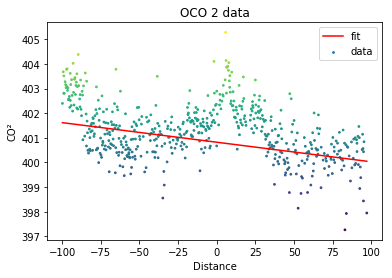

In [293]:
peak = df_peak_new_outliers.iloc[1]

popt = peak['popt']
orbit = peak['orbit']

df_orbit = df_full[df_full['orbit'] == orbit]
km_start = df_orbit.loc[peak['sounding'], 'distance']
km_end = km_start + window/2
# Slice back because our input point is the middle of the peak
df_slice = df_full.query('distance >= (@km_start-@window/2) and distance <= @km_end and orbit == @orbit')
x = df_slice['distance']-km_start
y = df_slice['xco2']
plt.scatter(x, y, c=y, s=3, label='data')
plt.plot(x, gaussian(x, m=popt[0], b=popt[1], A=popt[2], sig=popt[3]), 'r', label='fit')
plt.legend()
plt.title('OCO 2 data')
plt.xlabel('Distance')
plt.ylabel('CO²')
plt.show()

In [287]:
#Next steps:
# refine features to describe better the gaussian before anomaly detection and find the way to select the right gaussian
#check other algos
# visualize & compare anomalies detected this way with FC selected gaussian + on the map